In [ ]:
conda install -c conda-forge imbalanced-learn

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [155]:
#!pip install imblearn

In [144]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.model_selection import train_test_split # train-test split
from sklearn.metrics import confusion_matrix, classification_report # classification metrics
from imblearn.over_sampling import SMOTE # SMOTE
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler # scaling methods

from sklearn.model_selection import GridSearchCV # grid search cross validation
from sklearn.model_selection import RandomizedSearchCV # randomized search cross validation

# supervised learning algorithms
from sklearn.neighbors import KNeighborsClassifier # K-Nearest Neighbbors
from sklearn.naive_bayes import GaussianNB # Gaussain Naive Bayes
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.ensemble import AdaBoostClassifier # Adaptive Boosting Classifier
from sklearn.ensemble import BaggingClassifier # Bootstrap Aggregating Classifier
from sklearn.linear_model import LogisticRegression

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**READ THE DATA**

In [3]:
df = pd.concat([pd.read_csv('/content/sample_data/fraudTrain.csv'),pd.read_csv('/content/sample_data/fraudTest.csv')], ignore_index=True)
df.head(2)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0


In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True) # unnecessary column

In [5]:
df.shape

(1852394, 22)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   first                  object 
 6   last                   object 
 7   gender                 object 
 8   street                 object 
 9   city                   object 
 10  state                  object 
 11  zip                    int64  
 12  lat                    float64
 13  long                   float64
 14  city_pop               int64  
 15  job                    object 
 16  dob                    object 
 17  trans_num              object 
 18  unix_time              int64  
 19  merch_lat              float64
 20  merch_long             float64
 21  is_fraud               int64  
dtypes: float64(5), int

In [7]:
df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03
std,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00
50%,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00
75%,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00
max,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00


**ANALYSING THE DATA**

In [8]:
#pip install -U pandas-profiling

In [9]:
#import pandas_profiling

#df.profile_report()

**MISSING VALUE ANALYSIS**

In [10]:
# Checking Null values
df.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [11]:
round((df.isnull().sum()/len(df))*100,5)

trans_date_trans_time    0.0
cc_num                   0.0
merchant                 0.0
category                 0.0
amt                      0.0
first                    0.0
last                     0.0
gender                   0.0
street                   0.0
city                     0.0
state                    0.0
zip                      0.0
lat                      0.0
long                     0.0
city_pop                 0.0
job                      0.0
dob                      0.0
trans_num                0.0
unix_time                0.0
merch_lat                0.0
merch_long               0.0
is_fraud                 0.0
dtype: float64

In [12]:
df.dropna(axis=0,inplace=True)

In [13]:
df.shape

(1852394, 22)

In [14]:
# Checking Null values
df.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

**Converting dob,trans_date_trans_time column to datetime data type and creating new 'trans_date' column**-

In [15]:
df['trans_date_trans_time']=pd.to_datetime(df['trans_date_trans_time'])
df['trans_date']=df['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
df['trans_date']=pd.to_datetime(df['trans_date'])
df['dob']=pd.to_datetime(df['dob'])

**FEATURE EXTRACTION**

In [18]:
df['trans_month']=df['trans_date'].dt.month
df['year']=df['trans_date'].dt.year
df['week_day']=df['trans_date'].dt.weekday
df['weekday_no'] = df['trans_date_trans_time'].dt.dayofweek
df['week_no'] = df['trans_date_trans_time'].dt.week
df['day_no'] = df['trans_date_trans_time'].dt.day
df['min_day'] = df['trans_date_trans_time'].dt.minute
df['hr_day'] = df['trans_date_trans_time'].dt.hour

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """


In [19]:
import calendar
df['Month_name'] = df['trans_month'].apply(lambda x: calendar.month_abbr[x])

In [20]:
df['trans_month'].value_counts()

12    280598
8     176118
6     173869
7     172444
5     146875
3     143789
11    143056
9     140185
10    138106
4     134970
1     104727
2      97657
Name: trans_month, dtype: int64

In [21]:
df.trans_date.head(),df.dob.head()

(0   2019-01-01
 1   2019-01-01
 2   2019-01-01
 3   2019-01-01
 4   2019-01-01
 Name: trans_date, dtype: datetime64[ns], 0   1988-03-09
 1   1978-06-21
 2   1962-01-19
 3   1967-01-12
 4   1986-03-28
 Name: dob, dtype: datetime64[ns])

**Merging first and last names and dropping original column**

In [22]:
df['Full_Name'] = df['first'] +' ' + df['last']
df.drop(['first','last'],1,inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


## Average number of transaction per month for the total transaction





In [23]:
pd.set_option('display.max_columns',None)
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,trans_month,year,week_day,weekday_no,week_no,day_no,min_day,hr_day,Month_name,Full_Name
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019-01-01,1,2019,1,1,1,1,0,0,Jan,Jennifer Banks
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01,1,2019,1,1,1,1,0,0,Jan,Stephanie Gill
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019-01-01,1,2019,1,1,1,1,0,0,Jan,Edward Sanchez
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,2019-01-01,1,2019,1,1,1,1,1,0,Jan,Jeremy White
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,2019-01-01,1,2019,1,1,1,1,3,0,Jan,Tyler Garcia


In [24]:
df['trans_num'].nunique()

1852394

In [25]:
df.shape

(1852394, 31)

In [26]:
df.trans_month.value_counts()

12    280598
8     176118
6     173869
7     172444
5     146875
3     143789
11    143056
9     140185
10    138106
4     134970
1     104727
2      97657
Name: trans_month, dtype: int64

In [27]:
df2=df[['trans_month','trans_num','cc_num']]
df2.head()

,trans_month,trans_num,cc_num
0,1,0b242abb623afc578575680df30655b9,2703186189652095
1,1,1f76529f8574734946361c461b024d99,630423337322
2,1,a1a22d70485983eac12b5b88dad1cf95,38859492057661
3,1,6b849c168bdad6f867558c3793159a81,3534093764340240
4,1,a41d7549acf90789359a9aa5346dcb46,375534208663984


In [28]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 1852393
Data columns (total 3 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   trans_month  int64 
 1   trans_num    object
 2   cc_num       int64 
dtypes: int64(2), object(1)
memory usage: 56.5+ MB


In [29]:
# unique transactions in each month
data=df2.groupby(['trans_month'])['cc_num'].nunique().to_dict()
data

{1: 916,
 2: 919,
 3: 920,
 4: 919,
 5: 917,
 6: 911,
 7: 913,
 8: 911,
 9: 919,
 10: 917,
 11: 912,
 12: 918}

In [30]:
#Creating a dataframe with unique transactions in each month
df3=pd.DataFrame.from_dict(data, orient ='index') 
df3

,0
1,916
2,919
3,920
4,919
5,917
6,911
7,913
8,911
9,919
10,917


In [31]:
# total number of transactions in each month
data1=df2.groupby(['trans_month'])['trans_num'].count().to_dict()
data1

{1: 104727,
 2: 97657,
 3: 143789,
 4: 134970,
 5: 146875,
 6: 173869,
 7: 172444,
 8: 176118,
 9: 140185,
 10: 138106,
 11: 143056,
 12: 280598}

In [32]:
#Creating a dataframe with total number of transactions in each month
df4=pd.DataFrame.from_dict(data1, orient ='index') 
df4

,0
1,104727
2,97657
3,143789
4,134970
5,146875
6,173869
7,172444
8,176118
9,140185
10,138106


In [33]:
df_all_trans=pd.concat([df3,df4],axis=1)
df_all_trans.columns=['unique_trans','tot_trans']
df_all_trans

,unique_trans,tot_trans
1,916,104727
2,919,97657
3,920,143789
4,919,134970
5,917,146875
6,911,173869
7,913,172444
8,911,176118
9,919,140185
10,917,138106


In [34]:
df_all_trans['avg_trans']=df_all_trans['tot_trans']//df_all_trans['unique_trans']
df_all_trans=df_all_trans.reset_index()

In [35]:
# Final Dataframe with average number of transactions per month 
df_all_trans.rename(columns = {'index':'month'}, inplace = True)
df_all_trans

,month,unique_trans,tot_trans,avg_trans
0,1,916,104727,114
1,2,919,97657,106
2,3,920,143789,156
3,4,919,134970,146
4,5,917,146875,160
5,6,911,173869,190
6,7,913,172444,188
7,8,911,176118,193
8,9,919,140185,152
9,10,917,138106,150


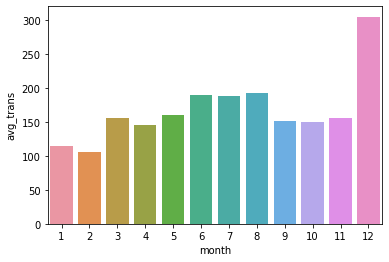

In [36]:
sns.barplot(x=df_all_trans['month'],y=df_all_trans['avg_trans'])

**Average number of transactions is higher for the month of December,June and August**





In [37]:
df2.groupby(['trans_month','cc_num'])['trans_num'].count()

trans_month  cc_num             
1            60416207185            117
             60422928733            113
             60423098130             41
             60427851591             39
             60487002085             48
                                   ... 
12           4958589671582726883    348
             4973530368125489546    236
             4980323467523543940    119
             4989847570577635369    217
             4992346398065154184    416
Name: trans_num, Length: 10992, dtype: int64

In [38]:
df.head(2)

,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,trans_month,year,week_day,weekday_no,week_no,day_no,min_day,hr_day,Month_name,Full_Name
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019-01-01,1,2019,1,1,1,1,0,0,Jan,Jennifer Banks
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01,1,2019,1,1,1,1,0,0,Jan,Stephanie Gill


In [45]:
#dataframe with fradulent Transactions
df_fraud=df[df['is_fraud']==1]
df_fraud.head(2)

,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,trans_month,year,week_day,weekday_no,week_no,day_no,min_day,hr_day,Month_name,Full_Name
2449,2019-01-02 01:06:37,4613314721966,fraud_Rutherford-Mertz,grocery_pos,281.06,M,542 Steve Curve Suite 011,Collettsville,NC,28611,35.9946,-81.7266,885,Soil scientist,1988-09-15,e8a81877ae9a0a7f883e15cb39dc4022,1325466397,36.430124,-81.179483,1,2019-01-02,1,2019,2,2,1,2,6,1,Jan,Jason Murphy
2472,2019-01-02 01:47:29,340187018810220,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.52,F,27954 Hall Mill Suite 575,San Antonio,TX,78208,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,bc7d41c41103877b03232f03f1f8d3f5,1325468849,29.819364,-99.142791,1,2019-01-02,1,2019,2,2,1,2,47,1,Jan,Misty Hart


In [46]:
#Average amount for fraud Transaction
df_fraud.amt.describe()

count    9651.000000
mean      530.661412
std       391.028873
min         1.060000
25%       240.075000
50%       390.000000
75%       902.365000
max      1376.040000
Name: amt, dtype: float64

In [47]:
#dataframe with valid Transactions
df_valid=df[df['is_fraud']==0]
df_valid.head(2)

,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,trans_month,year,week_day,weekday_no,week_no,day_no,min_day,hr_day,Month_name,Full_Name
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019-01-01,1,2019,1,1,1,1,0,0,Jan,Jennifer Banks
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01,1,2019,1,1,1,1,0,0,Jan,Stephanie Gill


In [48]:
#Average amount for valid Transaction
df_valid.amt.describe()

count    1.842743e+06
mean     6.765128e+01
std      1.535481e+02
min      1.000000e+00
25%      9.610000e+00
50%      4.724000e+01
75%      8.256000e+01
max      2.894890e+04
Name: amt, dtype: float64

**As you can see the average amount for the fraud transaction is much higher than the average amount per valid Transaction , Hence it is a serious issue**

In [49]:
# Top fraudulent transaction amount
df_fraud[df_fraud['is_fraud'] == 1]['amt'].sort_values(ascending=False)[:10] 

1262544    1376.04
514148     1371.81
30239      1334.07
1258483    1324.80
1570853    1320.92
1452524    1319.97
1721799    1318.89
821435     1313.18
1258594    1312.98
872879     1294.83
Name: amt, dtype: float64

**Aggregation of amount by year and category for fradualent transactions**

In [50]:
df_fraud.groupby(["year",'category'])['amt'].agg(['sum'])

sum
year category                  
2019 entertainment     82990.86
     food_dining       12401.85
     gas_transport      5433.09
     grocery_net        1172.03
     grocery_pos      375168.02
     health_fitness     1944.62
     home              33465.91
     kids_pets          3076.31
     misc_net         500575.67
     misc_pos          31586.32
     personal_care      4024.29
     shopping_net    1202563.42
     shopping_pos     512650.43
     travel              770.05
2020 entertainment     64409.10
     food_dining       12337.31
     gas_transport      4009.44
     grocery_net         936.18
     grocery_pos      320496.60
     health_fitness     1806.74
     home              34766.05
     kids_pets          2543.22
     misc_net         443434.04
     misc_pos          36908.52
     personal_care      3547.67
     shopping_net    1012284.22
     shopping_pos     415481.91
     travel              629.42

**Top 10 fradualent credit card numbers with amount**

In [51]:
df_fraud.groupby(['cc_num'])['amt'].sum().sort_values(ascending=False)[:10]

cc_num
3520550088202337       12011.59
4599285557366057       12002.06
3588001568691267       11641.22
5388659976630693       11061.27
4633065159406313       10994.76
6538441737335434       10956.00
4855488158131690372    10894.97
6011693194885790       10705.82
3519232971341141       10562.21
2720433095629877       10454.66
Name: amt, dtype: float64

**People creating most frauds**

In [52]:
#df_fraud.groupby(['Full_Name'])['dist_same_origin_co-ord(kms)'].mean().sort_values(ascending=False)[:10]

**Mean amount in cities with fraud**

In [53]:
df_fraud.groupby(['city'])['amt'].mean().sort_values(ascending=False)[:10]

city
De Lancey         926.156667
Monmouth Beach    920.257778
North East        918.425556
Schaefferstown    897.211111
Thida             888.572500
Harrodsburg       884.250000
Oakford           878.527500
Karns City        874.505714
Fordoche          869.980000
Glade Spring      864.783750
Name: amt, dtype: float64

**Work profile in which highest fraud is committed**

In [54]:
df_fraud.groupby(['job'])['amt'].mean().sort_values(ascending=False)[:10]

job
Health promotion specialist    920.257778
Ship broker                    874.505714
Community education officer    869.980000
Clinical psychologist          864.783750
Hydrologist                    818.023889
Commissioning editor           804.376667
Medical physicist              801.131429
Hospital pharmacist            776.057500
Plant breeder/geneticist       773.039000
Catering manager               763.103750
Name: amt, dtype: float64

## Average number of transaction per month for the fraudelent transaction

In [55]:
# unique transactions in each month
data=df_fraud.groupby(['trans_month'])['cc_num'].nunique().to_dict()
data

{1: 90,
 2: 88,
 3: 94,
 4: 77,
 5: 96,
 6: 82,
 7: 71,
 8: 80,
 9: 79,
 10: 89,
 11: 72,
 12: 88}

In [56]:
#Creating a dataframe with unique transactions in each month
df3=pd.DataFrame.from_dict(data, orient ='index') 
df3

,0
1,90
2,88
3,94
4,77
5,96
6,82
7,71
8,80
9,79
10,89


In [57]:
# total number of transactions in each month
data1=df_fraud.groupby(['trans_month'])['trans_num'].count().to_dict()
data1

{1: 849,
 2: 853,
 3: 938,
 4: 678,
 5: 935,
 6: 821,
 7: 652,
 8: 797,
 9: 758,
 10: 838,
 11: 682,
 12: 850}

In [58]:
#Creating a dataframe with total number of transactions in each month
df4=pd.DataFrame.from_dict(data1, orient ='index') 
df4

,0
1,849
2,853
3,938
4,678
5,935
6,821
7,652
8,797
9,758
10,838


In [59]:
df_fraud_trans=pd.concat([df3,df4],axis=1)
df_fraud_trans.columns=['unique_trans','tot_trans']
df_fraud_trans

,unique_trans,tot_trans
1,90,849
2,88,853
3,94,938
4,77,678
5,96,935
6,82,821
7,71,652
8,80,797
9,79,758
10,89,838


In [60]:
df_fraud_trans['avg_trans']=df_fraud_trans['tot_trans']//df_fraud_trans['unique_trans']
df_fraud_trans=df_fraud_trans.reset_index()

In [61]:
# Final Dataframe with average number of transactions per month 
df_fraud_trans.rename(columns = {'index':'month'}, inplace = True)
df_fraud_trans

,month,unique_trans,tot_trans,avg_trans
0,1,90,849,9
1,2,88,853,9
2,3,94,938,9
3,4,77,678,8
4,5,96,935,9
5,6,82,821,10
6,7,71,652,9
7,8,80,797,9
8,9,79,758,9
9,10,89,838,9


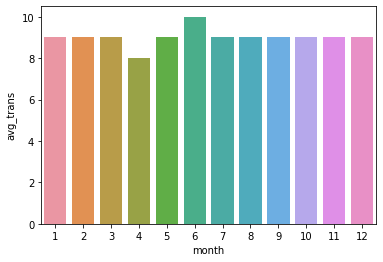

In [62]:
sns.barplot(x=df_fraud_trans['month'],y=df_fraud_trans['avg_trans'])

**Average number of fraudelent transactions is almost same for every month but slightly higher for the month of June and May**

In [63]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,trans_month,year,week_day,weekday_no,week_no,day_no,min_day,hr_day,Month_name,Full_Name
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019-01-01,1,2019,1,1,1,1,0,0,Jan,Jennifer Banks
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01,1,2019,1,1,1,1,0,0,Jan,Stephanie Gill
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019-01-01,1,2019,1,1,1,1,0,0,Jan,Edward Sanchez
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,2019-01-01,1,2019,1,1,1,1,1,0,Jan,Jeremy White
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,2019-01-01,1,2019,1,1,1,1,3,0,Jan,Tyler Garcia


**ANALYSISNG THE FRAUD TRANSACTIONS**

In [64]:
df['is_fraud'].value_counts()


0    1842743
1       9651
Name: is_fraud, dtype: int64

## VISUALIZATION

**Data Imbalance**

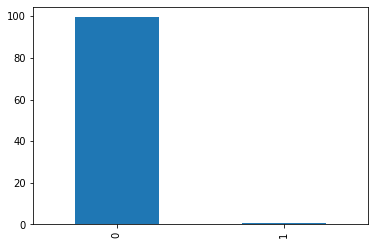

In [65]:
round(100*df['is_fraud'].value_counts(normalize=True),2).plot(kind='bar', figsize=(6,4))
plt.show()

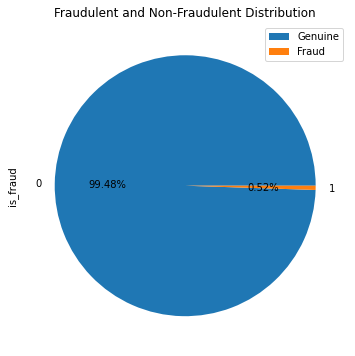

In [66]:
round(100*df['is_fraud'].value_counts(normalize=True),2).plot(kind='pie', figsize=(6, 6), autopct='%1.2f%%')
plt.title("Fraudulent and Non-Fraudulent Distribution")
plt.legend(["Genuine", "Fraud"])
plt.show()

**There is high imbalance in this dataset**

### Univariate Analysis

**To Analyze the amount for fraud and valid transactions**



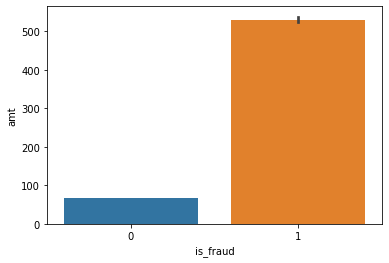

In [67]:
# Fraud and non-fraud amount
sns.barplot(data=df, x='is_fraud', y='amt')
plt.show()

We can see the amount of fraudulent transactions is more than that of genuine transactions

**To Analyze the fraud transactions in each category**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


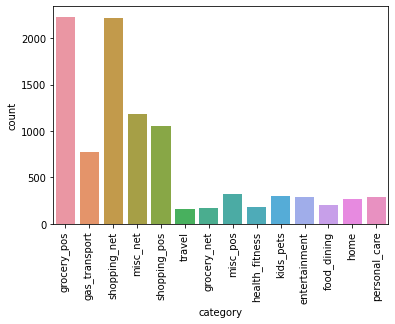

In [68]:
sns.countplot(df_fraud.category)
plt.xticks(rotation=90)
plt.show()


Here you can see that **GROCERY_POS and SHOPPING_NET** has higher fraudelent transactions



**To Analyze the fraud transactions amongst gender**

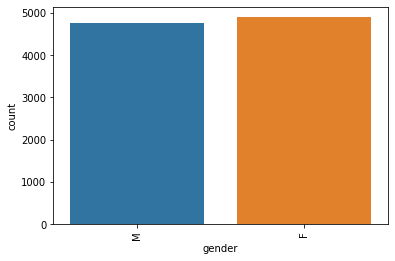

In [69]:
sns.countplot(x=df_fraud.gender)
plt.xticks(rotation=90)
plt.show()

Although more cases of fraud happened with female customers, the number is almost the same for both Males and Females

**To Analyze the fraud transactions in each state**

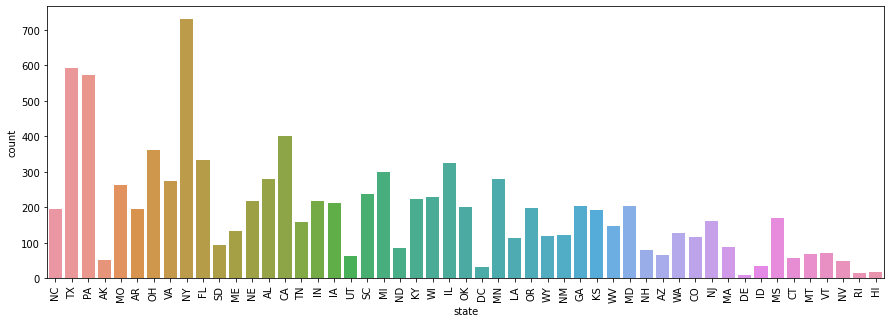

In [70]:
plt.figure(figsize=[15,5])
sns.countplot(x=df_fraud.state)
plt.xticks(rotation=90)
plt.show()

New York has the highest fraud card cases followed by Texas

**To Analyze the fraud transactions in each job city**

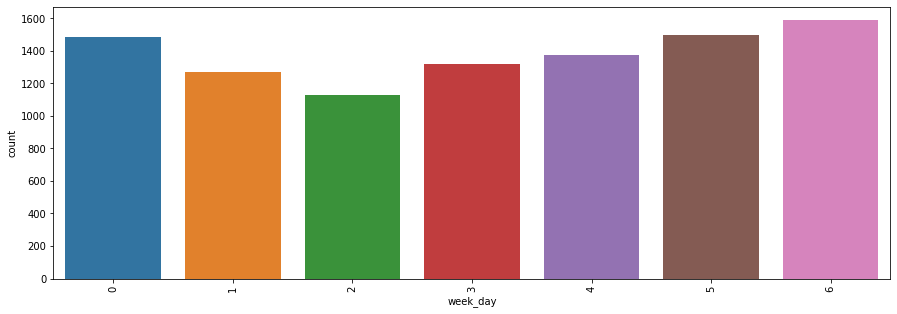

In [71]:
plt.figure(figsize=[15,5])
sns.countplot(x=df_fraud.week_day)
plt.xticks(rotation=90)
plt.show()

**Week_day = 6 and 5 indicates saturday and sunday respectively**

**To Analyze the fraud transactions in each job profile**

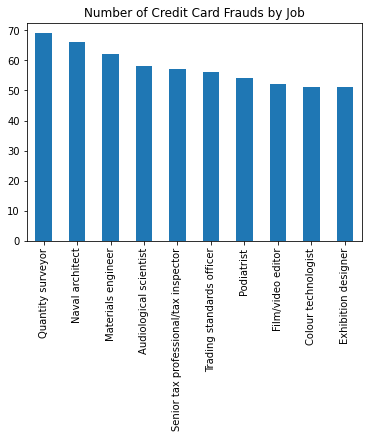

In [72]:
df[df['is_fraud']==1]["job"].value_counts(sort=True,ascending=False).head(10).plot(kind="bar")
plt.title("Number of Credit Card Frauds by Job")
plt.show()

**Quantity Survivor is the job profile where highest fradulent cases occurs**

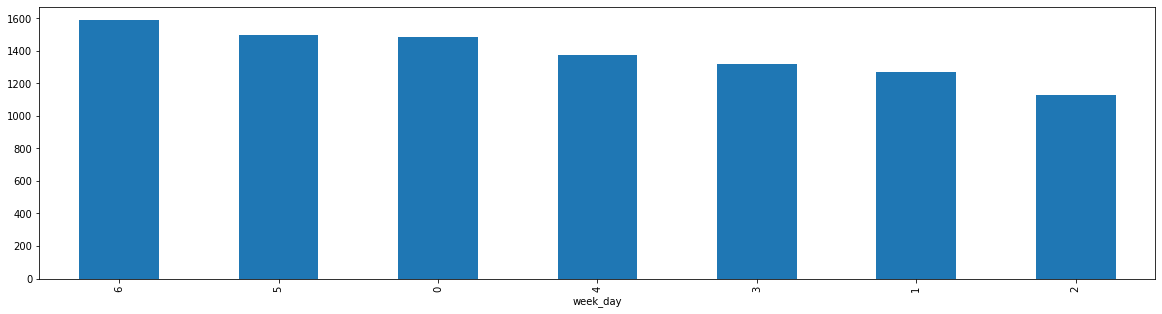

In [73]:
df_fraud.groupby('week_day')['is_fraud'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(20,5))

## Bivariate Analysis

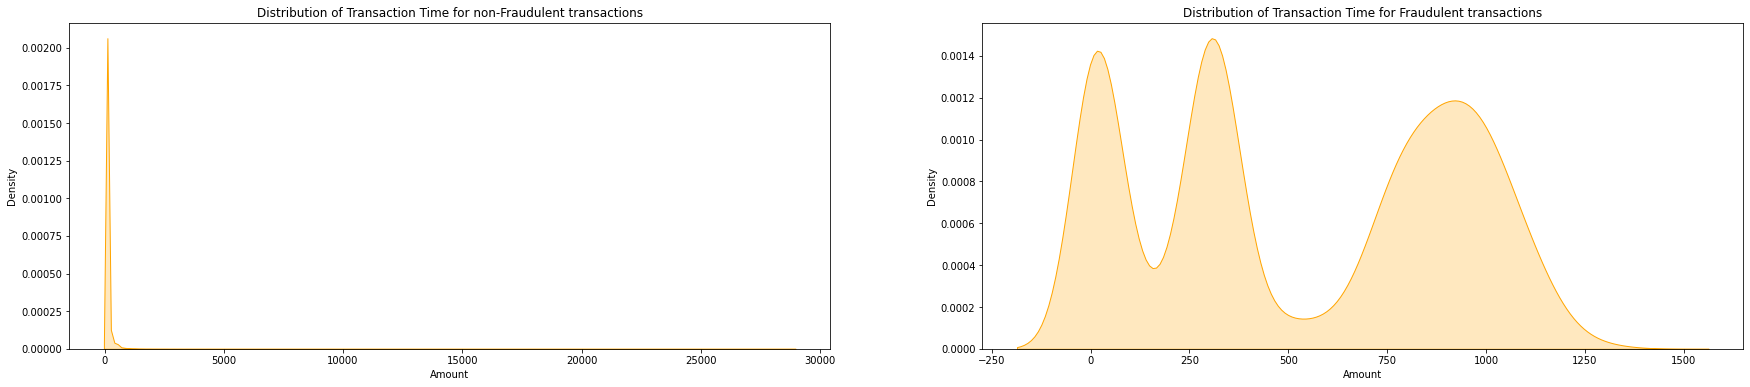

In [74]:
# Distribution of Transaction time for transactions
fig, axes = plt.subplots(ncols = 2, figsize=(30,6))

sns.kdeplot(data=df_valid["amt"], label="Not Fraud", shade=True, color='orange', ax=axes[0])
axes[0].set(xlabel ='Amount', ylabel ='Density')
axes[0].set_title('Distribution of Transaction Time for non-Fraudulent transactions')

sns.kdeplot(data=df_fraud["amt"], label="Fraud", shade=True, color='orange', ax=axes[1])
axes[1].set(xlabel ='Amount', ylabel ='Density')
axes[1].set_title('Distribution of Transaction Time for Fraudulent transactions')

plt.show()

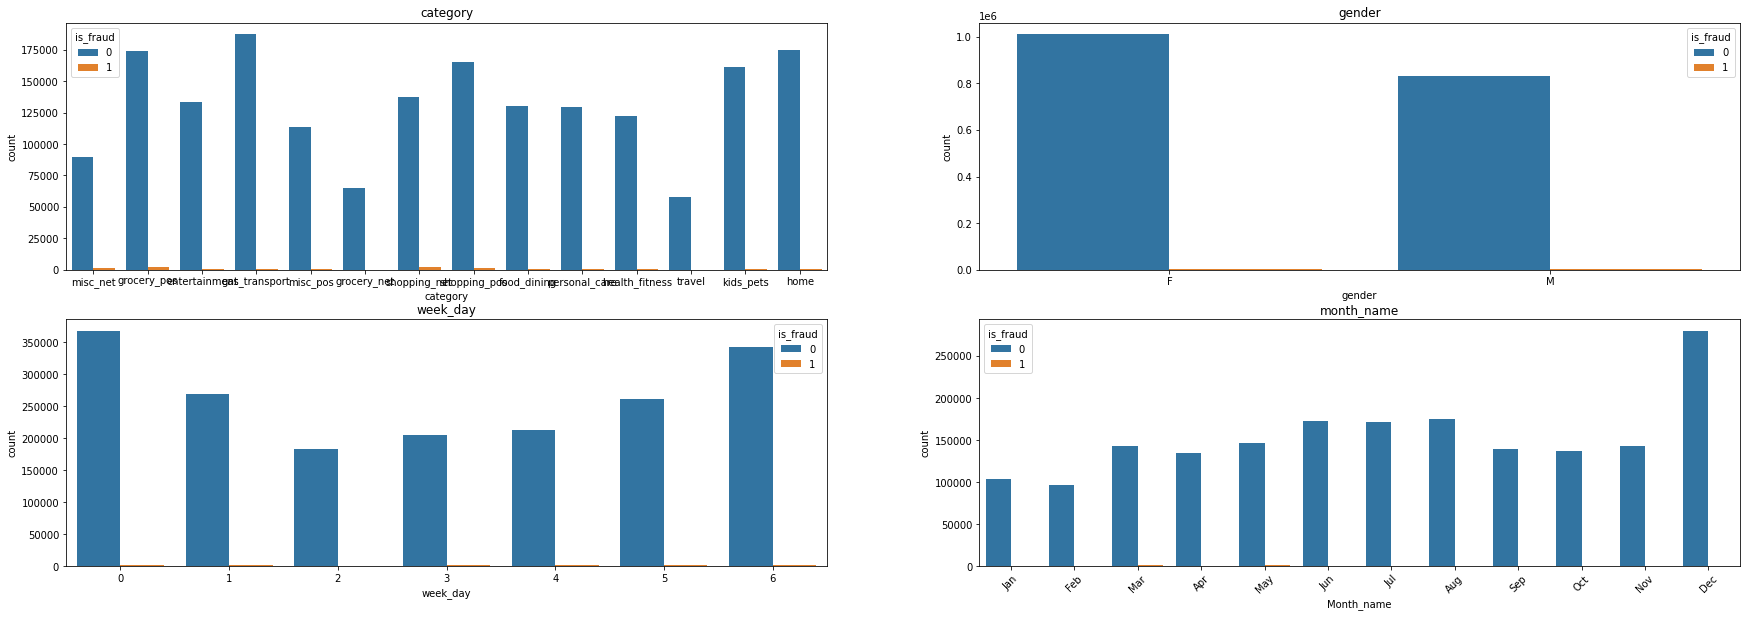

In [75]:
# Category, Gender, Month and Week wise transactions with target variable
fig, axes = plt.subplots(nrows=2, ncols = 2, figsize=(30,10))
plt.xticks(rotation=45)
sns.countplot(x="category", hue='is_fraud', data=df, ax=axes[0][0])
axes[0][0].set_title('category')


sns.countplot(x="gender", hue='is_fraud', data=df, ax=axes[0][1])
axes[0][1].set_title('gender')

sns.countplot(x="week_day", hue='is_fraud', data=df, ax=axes[1][0])
axes[1][0].set_title('week_day')

sns.countplot(x="Month_name", hue='is_fraud', data=df, ax=axes[1][1])
axes[1][1].set_title('month_name')

plt.show()

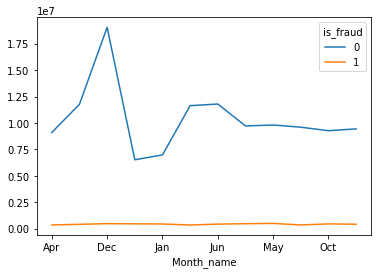

In [76]:
df.pivot_table('amt', index='Month_name', columns='is_fraud', aggfunc=sum).plot()


## Numerical Variable Analysis

In [77]:
from scipy.stats import norm, skew

In [78]:
#finding numerical columns
num_cols= df.select_dtypes(include=np.number).columns.to_list()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


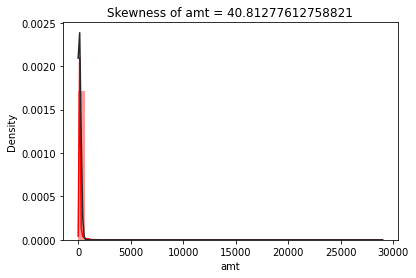

In [79]:
#plt.rcParams.update({'font.size': 10})
skewness = str(skew(df['amt']))
sns.distplot(df['amt'],fit = norm,color = 'red')
plt.title("Skewness of amt"+" = "+skewness)
plt.show()

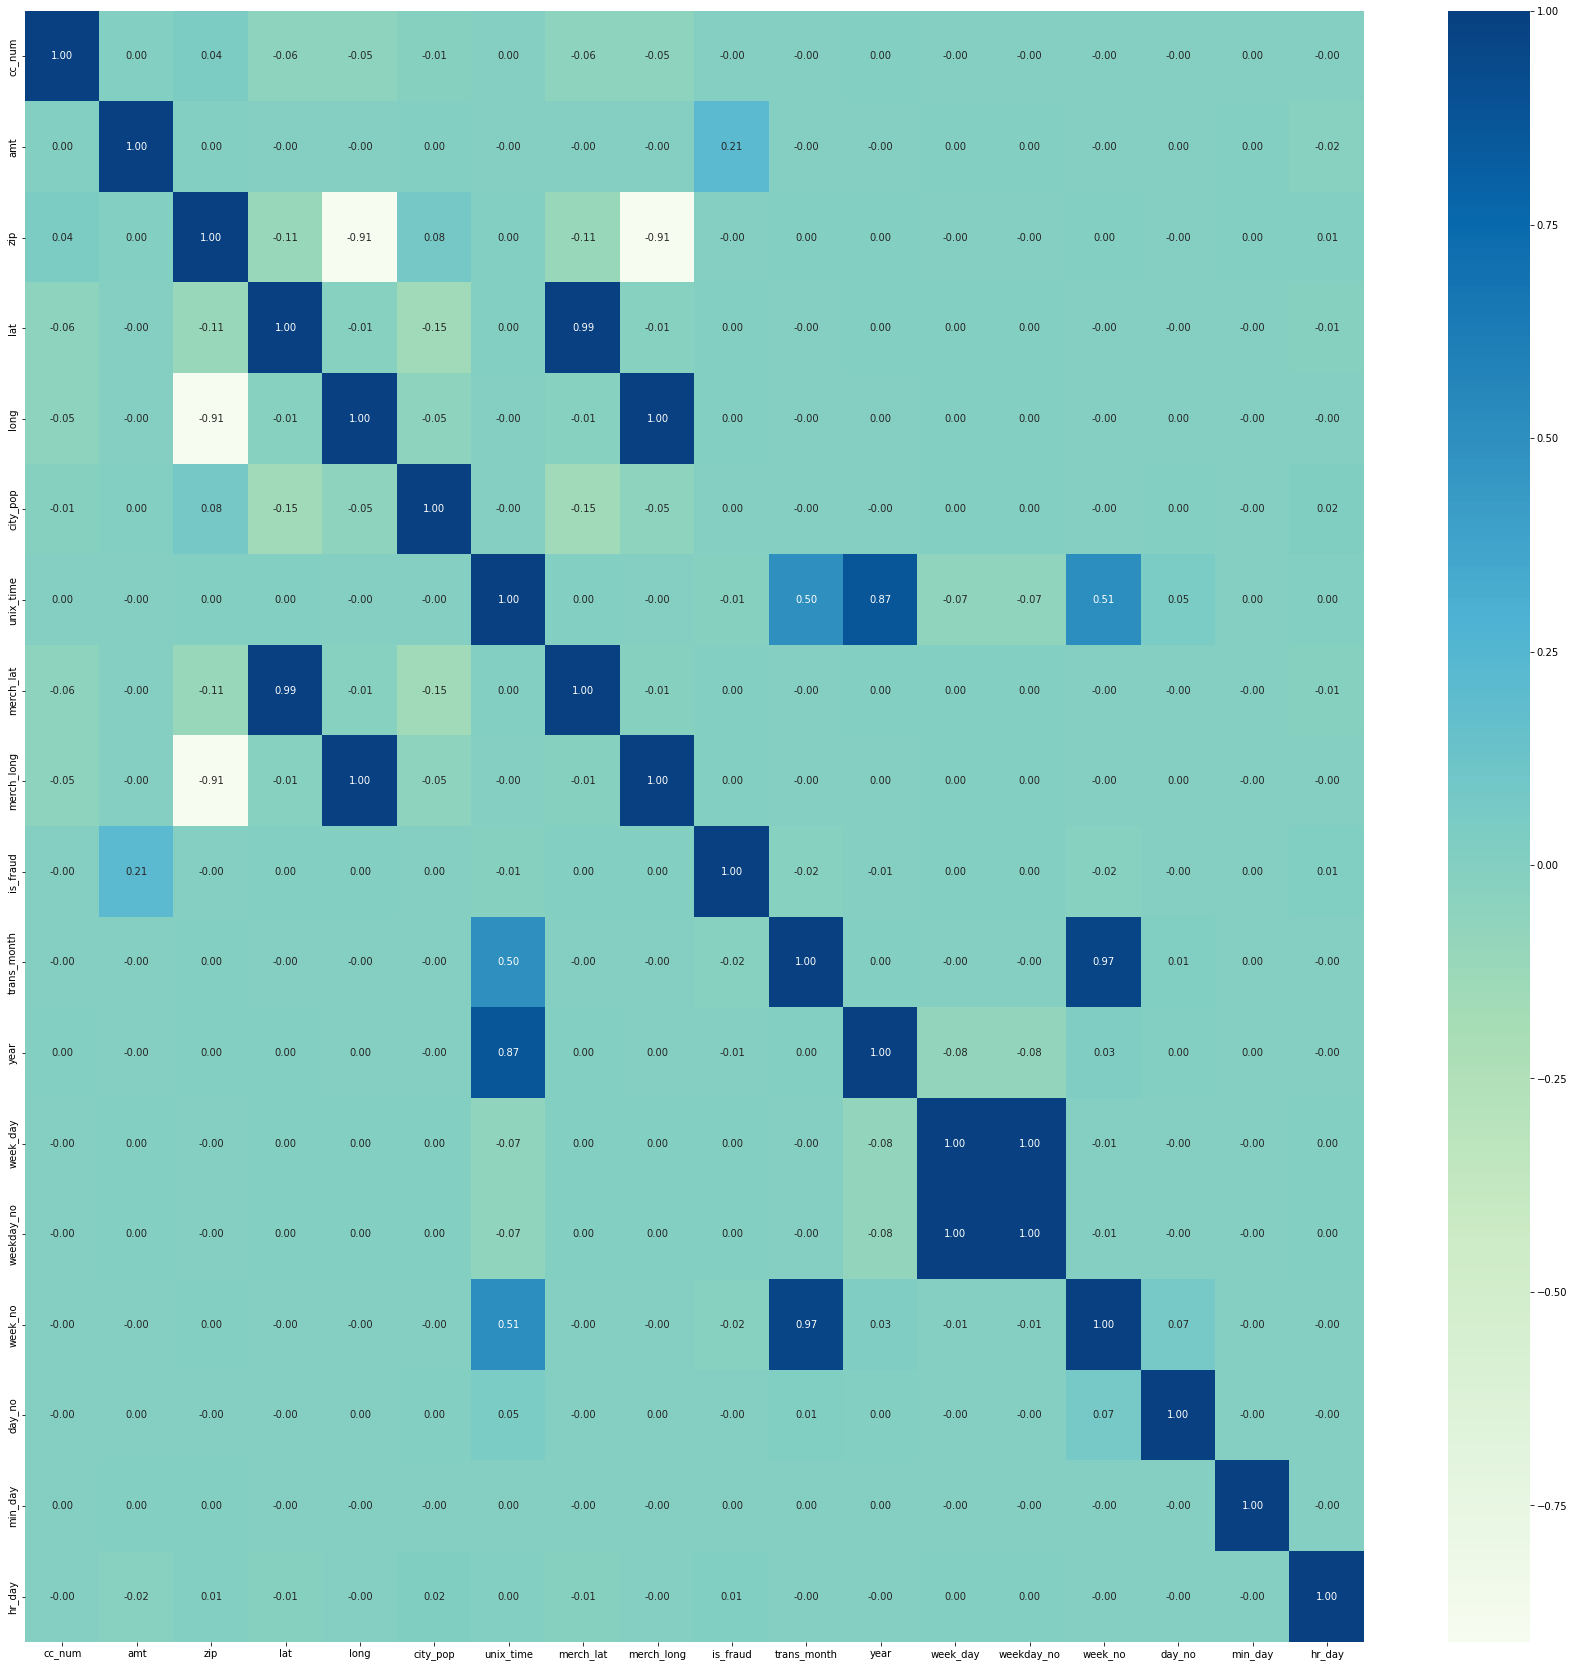

In [80]:
plt.figure(figsize = (30,30))
sns.heatmap(df.corr(),annot = True, cmap="GnBu",fmt='.2f')
plt.show()

In [81]:
df['gender']=df['gender'].apply(lambda x : 1 if x=='F'else 0)

In [82]:
corr = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.8 as they are highly correlated
to_drop = [i for i in upper.columns if any(upper[i] > 0.75)]
to_drop

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


['long', 'merch_lat', 'merch_long', 'year', 'weekday_no', 'week_no']

In [83]:
df.drop(to_drop, axis=1, inplace=True)

In [84]:
df.head(2)

,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,city_pop,job,dob,trans_num,unix_time,is_fraud,trans_date,trans_month,week_day,day_no,min_day,hr_day,Month_name,Full_Name
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,1,561 Perry Cove,Moravian Falls,NC,28654,36.0788,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,0,2019-01-01,1,1,1,0,0,Jan,Jennifer Banks
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,1,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,0,2019-01-01,1,1,1,0,0,Jan,Stephanie Gill


In [85]:
#dropping unwanted columns
df.drop(['trans_date_trans_time', 'cc_num', 'merchant', 'street', 'city', 'state', 'zip', 'lat', 'job', 'trans_num', 'unix_time', 'Full_Name', 'trans_date', 'week_day', 'Month_name'],1,inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [86]:
df.head(2)

,category,amt,gender,city_pop,dob,is_fraud,trans_month,day_no,min_day,hr_day
0,misc_net,4.97,1,3495,1988-03-09,0,1,1,0,0
1,grocery_pos,107.23,1,149,1978-06-21,0,1,1,0,0


In [87]:
cat_cols=df.select_dtypes(include='object').columns.to_list()
cat_cols

['category']

In [88]:

dummy=pd.get_dummies(df[cat_cols],drop_first=True)
df2=pd.concat([df,dummy],axis=1)
df2.head()
df2.drop(['category','dob'],axis=1,inplace=True)

In [103]:
#select few samples and numeric columns alone
df2 = df2.loc[:99999]
#df2.drop('dob',axis=1,inplace=True)

In [104]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   amt                      100000 non-null  float64
 1   gender                   100000 non-null  int64  
 2   city_pop                 100000 non-null  int64  
 3   is_fraud                 100000 non-null  int64  
 4   trans_month              100000 non-null  int64  
 5   day_no                   100000 non-null  int64  
 6   min_day                  100000 non-null  int64  
 7   hr_day                   100000 non-null  int64  
 8   category_food_dining     100000 non-null  uint8  
 9   category_gas_transport   100000 non-null  uint8  
 10  category_grocery_net     100000 non-null  uint8  
 11  category_grocery_pos     100000 non-null  uint8  
 12  category_health_fitness  100000 non-null  uint8  
 13  category_home            100000 non-null  uint8  
 14  categ

## TRAIN TEST SPLIT

In [105]:
X = df2.drop(['is_fraud'],axis=1)
y = df2['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Resampling via SMOTE**

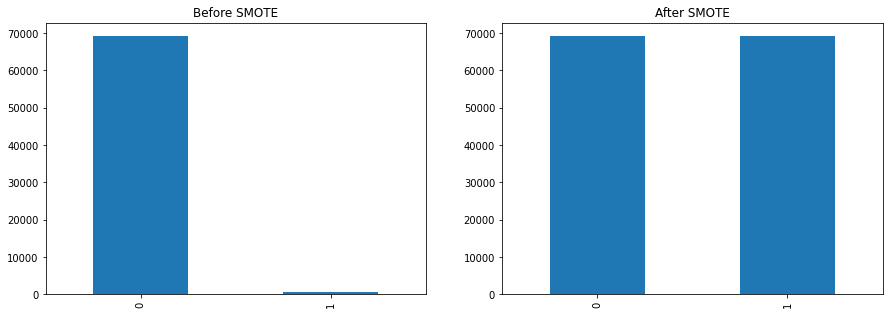

In [106]:
sm = SMOTE()
X_train_new, y_train_new = sm.fit_resample(X_train, y_train.ravel())

# to demonstrate the effect of SMOTE over imbalanced datasets
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize =(15, 5))
ax1.set_title('Before SMOTE')
pd.Series(y_train).value_counts().plot.bar(ax=ax1)

ax2.set_title('After SMOTE')  
pd.Series(y_train_new).value_counts().plot.bar(ax=ax2)

plt.show()

In [107]:
X_train, y_train = sm.fit_resample(X_train, y_train.ravel())

The dataset is heavily imbalanced. Through resampling, fraud transactions (Class = 1) are randomly increased to the same amount as non-fraud transactions (Class = 0) in order to avoid the bias results toward the non-fraudulent class.

In [108]:
scaler = StandardScaler()
standard_df = scaler.fit_transform(df2)
standard_df = pd.DataFrame(standard_df)

In [145]:
logs = LogisticRegression()
logs.fit(X_train,y_train)
log_pred = logs.predict(X_test)

print(confusion_matrix(y_test,log_pred))
print('\n')
print(classification_report(y_test,log_pred))

[[27216  2482]
 [   68   234]]


              precision    recall  f1-score   support

           0       1.00      0.92      0.96     29698
           1       0.09      0.77      0.16       302

    accuracy                           0.92     30000
   macro avg       0.54      0.85      0.56     30000
weighted avg       0.99      0.92      0.95     30000



In [109]:
## Decision Tree

In [110]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
dtree_pred = dtree.predict(X_test)

print(confusion_matrix(y_test,dtree_pred))
print('\n')
print(classification_report(y_test,dtree_pred))

[[29245   453]
 [   68   234]]


              precision    recall  f1-score   support

           0       1.00      0.98      0.99     29698
           1       0.34      0.77      0.47       302

    accuracy                           0.98     30000
   macro avg       0.67      0.88      0.73     30000
weighted avg       0.99      0.98      0.99     30000



In [111]:
## Random Forest

In [112]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)

print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

[[29449   249]
 [   64   238]]


              precision    recall  f1-score   support

           0       1.00      0.99      0.99     29698
           1       0.49      0.79      0.60       302

    accuracy                           0.99     30000
   macro avg       0.74      0.89      0.80     30000
weighted avg       0.99      0.99      0.99     30000



In [101]:
## Adaboost Classifier

In [113]:
adabc = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=200)
adabc.fit(X_train,y_train)
adabc_pred = adabc.predict(X_test)

print(confusion_matrix(y_test,adabc_pred))
print('\n')
print(classification_report(y_test,adabc_pred))

[[28673  1025]
 [   52   250]]


              precision    recall  f1-score   support

           0       1.00      0.97      0.98     29698
           1       0.20      0.83      0.32       302

    accuracy                           0.96     30000
   macro avg       0.60      0.90      0.65     30000
weighted avg       0.99      0.96      0.97     30000



In [142]:
## Guasian Naive bayes

In [114]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
gnb_pred = gnb.predict(X_test)

print(confusion_matrix(y_test,gnb_pred))
print('\n')
print(classification_report(y_test,gnb_pred))

[[28363  1335]
 [   92   210]]


              precision    recall  f1-score   support

           0       1.00      0.96      0.98     29698
           1       0.14      0.70      0.23       302

    accuracy                           0.95     30000
   macro avg       0.57      0.83      0.60     30000
weighted avg       0.99      0.95      0.97     30000



In [143]:
# KNN

In [ ]:
param_grid = {'n_neighbors': range(1,20)}
clf = RandomizedSearchCV(KNeighborsClassifier(), param_grid)
clf.fit(X_train,y_train)
clf_pred = clf.predict(X_test)


In [135]:
### Determining the number of neighbors using RandomizedSearchCV
param_grid = {'n_neighbors': range(1,20)}
knn = RandomizedSearchCV(KNeighborsClassifier(), param_grid, verbose=3)
knn.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END .....................n_neighbors=8;, score=0.972 total time= 1.1min
[CV 2/5] END .....................n_neighbors=8;, score=0.973 total time= 1.1min
[CV 3/5] END .....................n_neighbors=8;, score=0.974 total time= 1.1min
[CV 4/5] END .....................n_neighbors=8;, score=0.974 total time= 1.1min
[CV 5/5] END .....................n_neighbors=8;, score=0.974 total time= 1.2min
[CV 1/5] END .....................n_neighbors=3;, score=0.980 total time=  43.5s
[CV 2/5] END .....................n_neighbors=3;, score=0.979 total time=  43.6s
[CV 3/5] END .....................n_neighbors=3;, score=0.980 total time=  43.5s
[CV 4/5] END .....................n_neighbors=3;, score=0.981 total time=  43.7s
[CV 5/5] END .....................n_neighbors=3;, score=0.979 total time=  43.2s
[CV 1/5] END .....................n_neighbors=2;, score=0.983 total time=  37.8s
[CV 2/5] END .....................n_neighbors=2;

RandomizedSearchCV(estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': range(1, 20)},
                   verbose=3)

In [136]:
knn.best_params_ # best parameter
knn_pred = knn.predict(X_test)

print(confusion_matrix(y_test,knn_pred))
print('\n')
print(classification_report(y_test,knn_pred))

[[29060   638]
 [   80   222]]


              precision    recall  f1-score   support

           0       1.00      0.98      0.99     29698
           1       0.26      0.74      0.38       302

    accuracy                           0.98     30000
   macro avg       0.63      0.86      0.68     30000
weighted avg       0.99      0.98      0.98     30000



In [120]:
## Bagging

In [116]:
bgc = BaggingClassifier(DecisionTreeClassifier(),n_estimators=200)
bgc.fit(X_train,y_train)
bgc_pred = bgc.predict(X_test)

print(confusion_matrix(y_test,bgc_pred))
print('\n')
print(classification_report(y_test,bgc_pred))

[[29369   329]
 [   63   239]]


              precision    recall  f1-score   support

           0       1.00      0.99      0.99     29698
           1       0.42      0.79      0.55       302

    accuracy                           0.99     30000
   macro avg       0.71      0.89      0.77     30000
weighted avg       0.99      0.99      0.99     30000



In [ ]:
## Classification Evaluation via AUROC 

In [137]:
from sklearn.metrics import roc_curve, roc_auc_score


# Instantiate the classfiers and make a list
classifiers = [GaussianNB(), 
               KNeighborsClassifier(n_neighbors= knn.best_params_.get('n_neighbors')),
               DecisionTreeClassifier(random_state=42),
               RandomForestClassifier(random_state=42),
               AdaBoostClassifier(random_state=42),
               BaggingClassifier(random_state=42)
              ]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

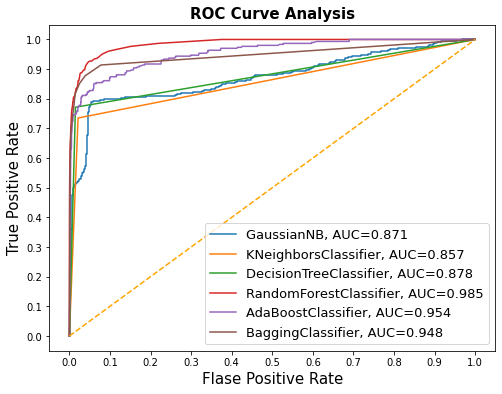

In [138]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

 Accuracy cannot be counted on when dealing with unbalanced datasets since it cannot detect all fradualent transactions.
- Recall says out of fradualent transactions. what percentage were correctly identified. Recall is very effective in imbalanced data sets. We got best Recall score from DT model as 77%. Our model has correctly predicted 77% of all fradualent transactions though RF predicted 79%.
- Precision says out of all fradualent transactions predicted to be fraudalent, how many were actually fradualent. Our Decision tree model gave 34% precision though Random forest model gave 49%.
- F1-Score is the weighted average of Precision and Recall and F1 score takes both false positives and false negatives into consideration and is very effective in imbalanced datasets. DT and RF precited 47% and 60% respectively.
- We got Area under curve in ROC as 98% in Random forest model. Higher the AUC score better is the model at predicting fradualent and non-fraudalent transactions.
- AUC of Precision Recall curve we got is 87% from Decision Tree model.

In [ ]:
rfc.feature_importances_
final_df = pd.DataFrame({'Varname': X_test.columns, 'feature_imp':rfc.feature_importances_})
final_df.sort_values(by='feature_imp', ascending=False)

,Varname,feature_imp
0,amt,0.531174
2,city_pop,0.110272
4,hr_day,0.065920
3,min_day,0.034024
10,category_home,0.031070
11,category_kids_pets,0.026882
5,category_food_dining,0.023060
13,category_misc_pos,0.022643
14,category_personal_care,0.020705
16,category_shopping_pos,0.020689


In [ ]:
dtree.feature_importances_
final_df = pd.DataFrame({'Varname': X_test.columns, 'feature_imp':dtree.feature_importances_})
final_df.sort_values(by='feature_imp', ascending=False)

,Varname,feature_imp
0,amt,0.664087
2,city_pop,0.159167
4,hr_day,0.048214
3,min_day,0.027414
8,category_grocery_pos,0.015891
1,gender,0.013606
13,category_misc_pos,0.012680
17,category_travel,0.007861
5,category_food_dining,0.006991
16,category_shopping_pos,0.006468


In [ ]:
adabc.feature_importances_
final_df = pd.DataFrame({'Varname': X_test.columns, 'feature_imp':adabc.feature_importances_})
final_df.sort_values(by='feature_imp', ascending=False)

,Varname,feature_imp
2,city_pop,0.495
0,amt,0.210
4,hr_day,0.050
15,category_shopping_net,0.035
16,category_shopping_pos,0.025
12,category_misc_net,0.025
8,category_grocery_pos,0.020
17,category_travel,0.020
3,min_day,0.020
6,category_gas_transport,0.015


5 most important variables:

- Amount plays the most important role, since we can see that the mean amount in fraudulent transaction is higher than normal transaction.
- Grocery plays important role since a lot of fraudalent transactions happens over there.
- Hour of the day  and minute of the day are the very important factor because fraudsters commit the fraud during the time having more normal transactions.
- Gender (male) plays important role since there are lot of male fraudesters as per the data.

**Cost Benifit Analysis and Business Impact**

In [117]:
non_fraud= df[df['is_fraud'] == 0]
fraud= df[df['is_fraud'] == 1]


Average number of transactions per month

In [118]:
Avg_no_transactions_per_month = len(df)/12
Avg_no_transactions_per_month

154366.16666666666

Average number of fraudulent transactions per month

In [124]:
Avg_no_fraud_transactions_per_month = len(fraud)/12
Avg_no_fraud_transactions_per_month

804.25

Average amount per fraudulent transaction

In [125]:
Avg_amount_per_fraud_transactions = fraud['amt'].mean()
Avg_amount_per_fraud_transactions

530.6614122888789

Cost incurred per month before the model was deployed

In [126]:
cost_incurred_before_deploy = Avg_no_fraud_transactions_per_month * Avg_amount_per_fraud_transactions
cost_incurred_before_deploy

426784.44083333085

Number of Transactions detected as fradulent per month

In [127]:
# True Positive:Fraudulent transactions the model predicts as fraudulent

TP =2247/12
TP

187.25

Cost of providing customer executive support per fraudulent transaction detected by the model

In [128]:
Customer_service_cost = 1.5

Total cost of providing customer support per month for fraudulent transactions detected by the model

In [129]:
cust_sup_fraud_trans_per_month = TP * Customer_service_cost
cust_sup_fraud_trans_per_month

280.875

Average number of transactions per month that are fraudulent but not detected by the model

In [130]:
# False Negative: Fraudulent transactions the model predicts as normal
FN = 691/12
FN

57.583333333333336

Cost incurred due to fraudulent transactions left undetected by the model

In [131]:
cost_undetected_fraud = FN * Avg_amount_per_fraud_transactions
cost_undetected_fraud

30557.252990967943

Cost incurred per month after the model is built and deployed

In [132]:
cost_after_model_deploy = cust_sup_fraud_trans_per_month + cost_undetected_fraud
cost_after_model_deploy

30838.127990967943

In [133]:
Final_Savings = cost_incurred_before_deploy - cost_after_model_deploy
Final_Savings

395946.3128423629

Bussiness Impact:
- The imbalanced was taken and Data Processing was done. Data was scaled to remove any Skewness.
- Model was trained using normal data (unsampled/imbalanced) and trained again using sampled data.
- After training model,the trained algorithm was tested on Test data provided.
- I got the recall value of 0.79 which depicts the model correctly predicts 79% of fraudelent transactions.
- The cost incurred before model deployment is 426784.4 dollars per month and cost incurred after the model deployment is 30838.12 dollars and hence the final cost saved accounts to 395946 dollars after model Deployment.